# Homework 6, Exercise 1

## Lab Instructions
All your answers for this exercise should be written in this notebook. You shouldn't need to write or modify any other files.

**You should execute every block of code to not miss any dependency.**

*This exercise was developed by Maximilian Hüttenrauch for the KIT Cognitive Systems Lecture, July 2020.*

## Introduction

In this assignment, you will implement code that applies 2D convolution to grayscale images.

### Hints
- Be careful with indexing. I(x, y) -> x increases to the right, y increases down but numpy indexing is row column
- The convolution operation actually flips the filter (have a look at function $\texttt{np.flip}$)
- A fast implementation is better than a slow implementation (although gives same points), a slow implementation is
better than no implementation
- When implementing the padding functions it can be useful to differentiate between cases where no padding is needed
due to the filter dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib auto

We will do manipulations on the following image.

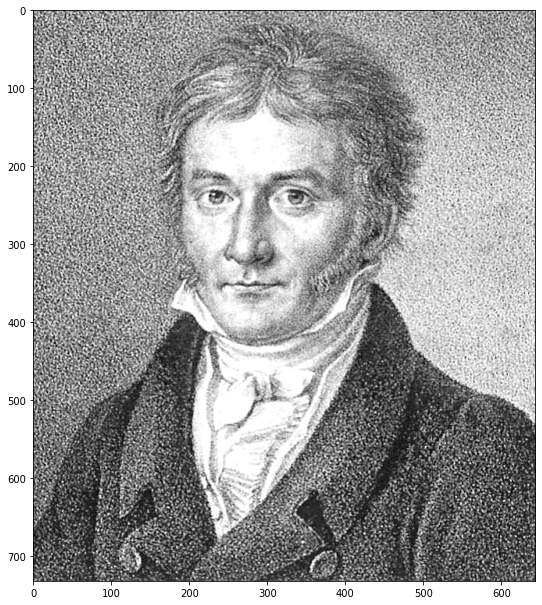

In [2]:
image = plt.imread("ex1/gauss.jpg").dot([0.07, 0.72, 0.21]) / 255

plt.figure(figsize=(9, 24))
plt.imshow(image, cmap="gray")
plt.show()

In [3]:
def conv2d(i, f, padding=None):
    """
    Perform 2D convolution on image i using kernel f
    :param i: A grayscale image
    :param f: A filter kernel
    :param padding: How to treat image boundaries.
            Accepted values: None -> no padding (default),
                            "zero" -> zero padding
                            "extend" -> nearest boundary pixel
    :return: image after convolution
    """
    r_i, c_i = i.shape
    r_f, c_f = f.shape

    if padding == "zero":
        """Exercise 1e)"""
        pad_r = r_f // 2
        pad_c = c_f // 2

        padded_i = np.zeros(shape=(r_i + 2 * pad_r, c_i + 2 * pad_c))

        if pad_r == 0:
            padded_i[:, pad_c:-pad_c] = i
        elif pad_c == 0:
            padded_i[pad_r:-pad_r, :] = i
        else:
            padded_i[pad_r:-pad_r, pad_c:-pad_c] = i
    elif padding == "extend":
        """Exercise 1f)"""
        pad_r = r_f // 2
        pad_c = c_f // 2

        padded_i = np.zeros(shape=(r_i + 2 * pad_r, c_i + 2 * pad_c))

        if pad_r == 0:
            padded_i[:, pad_c:-pad_c] = i
            padded_i[:, 0:pad_c] = i[:, [0]]
            padded_i[:, -pad_c:] = i[:, [-1]]
        elif pad_c == 0:
            padded_i[pad_r:-pad_r, :] = i
            padded_i[0:pad_r, :] = i[[0], :]
            padded_i[-pad_r:, :] = i[[-1], :]
        else:
            padded_i[pad_r:-pad_r, pad_c:-pad_c] = i

            padded_i[pad_r:-pad_r, 0:pad_c] = i[:, [0]]
            padded_i[pad_r:-pad_r, -pad_c:] = i[:, [-1]]
            padded_i[0:pad_r:, pad_c:-pad_c] = i[[0], :]
            padded_i[-pad_r:, pad_c:-pad_c] = i[[-1], :]

            padded_i[0:pad_r, 0:pad_c] = i[0, 0]
            padded_i[-pad_r:, 0:pad_c] = i[-1, 0]
            padded_i[0:pad_r, -pad_c:] = i[0, -1]
            padded_i[-pad_r:, -pad_c:] = i[-1, -1]

    else:
        pad_r = 0
        pad_c = 0

        padded_i = i

    out_r = r_i + 2 * pad_r - r_f + 1
    out_c = c_i + 2 * pad_c - c_f + 1
    out = np.zeros(shape=(out_r, out_c))

    for r in range(out_r):
        for c in range(out_c):
            out[r, c] = np.sum(padded_i[r:r+r_f, c:c+c_f] * f)

    return out

In [4]:
def gauss_filter(s, sigma):
    """
    Create a Gaussian blur filter of size s with bandwidth parameter sigma
    :param s: Filter size (should be uneven)
    :param sigma: Bandwidth of the Gaussian
    :return:
    """
    x = np.arange(s) - (s - 1) / 2
    y = np.arange(s) - (s - 1) / 2
    xx, yy = np.meshgrid(x, y)
    filt = (2 * np.pi * sigma**2)**-1 * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return filt / np.sum(filt)


## 1 d) Image gradient

ValueError: operands could not be broadcast together with shapes (732,643) (731,644) 

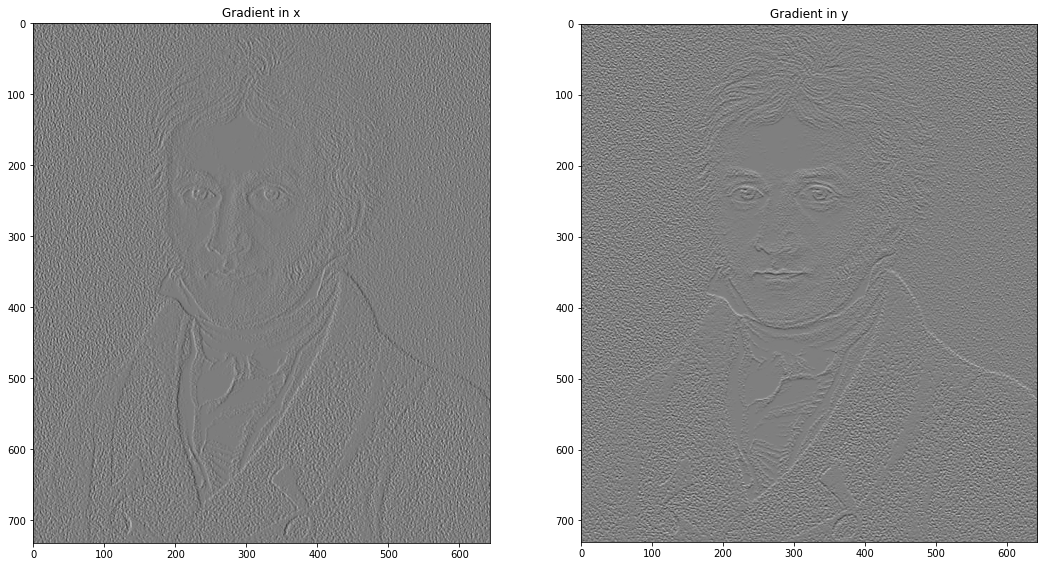

In [5]:
h_x = np.array([(1, -1)])
h_y = h_x.T

i_grad_x = conv2d(image, h_x)

i_grad_y = conv2d(image, h_y)

fig, ax = plt.subplots(1, 2, figsize=(18, 16))
ax[0].set_title("Gradient in x")
ax[0].imshow(i_grad_x / i_grad_x.max(), cmap="gray")
ax[1].set_title("Gradient in y")
ax[1].imshow(i_grad_y / i_grad_y.max(), cmap="gray")


grad_image = np.sqrt(i_grad_x ** 2 + i_grad_y ** 2)  # this is supposed to fail

## 1 e) Image gradient with zero padding

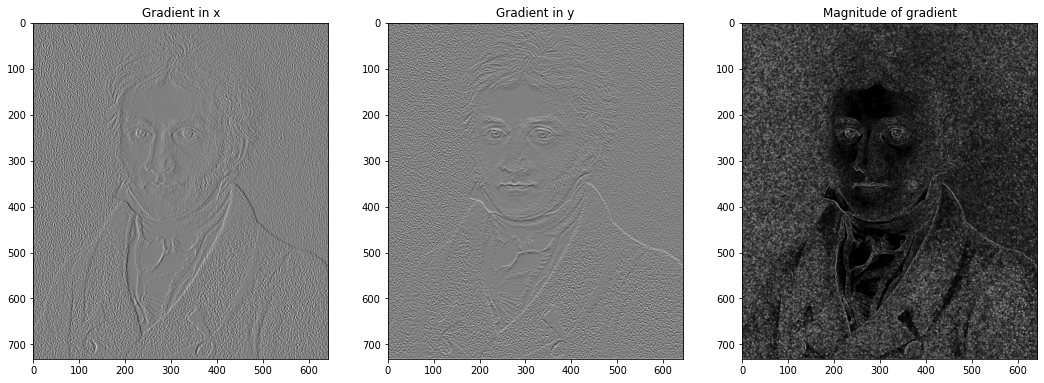

In [7]:
h_x = np.array([(1, 0, -1)])
h_y = h_x.T

i_grad_x_pad_0 = conv2d(image, h_x, padding="zero")

i_grad_y_pad_0 = conv2d(image, h_y, padding="zero")

grad_image_pad_0 = np.sqrt(i_grad_x_pad_0 ** 2 + i_grad_y_pad_0 ** 2)

fig, ax = plt.subplots(1, 3, figsize=(18, 16))
ax[0].set_title("Gradient in x")
ax[0].imshow(i_grad_x_pad_0 / i_grad_x_pad_0.max(), cmap="gray")
ax[1].set_title("Gradient in y")
ax[1].imshow(i_grad_y_pad_0 / i_grad_y_pad_0.max(), cmap="gray")
ax[2].set_title("Magnitude of gradient")
ax[2].imshow(grad_image_pad_0 / grad_image_pad_0.max(), cmap="gray")

## 1 f) Image gradient with extended padding

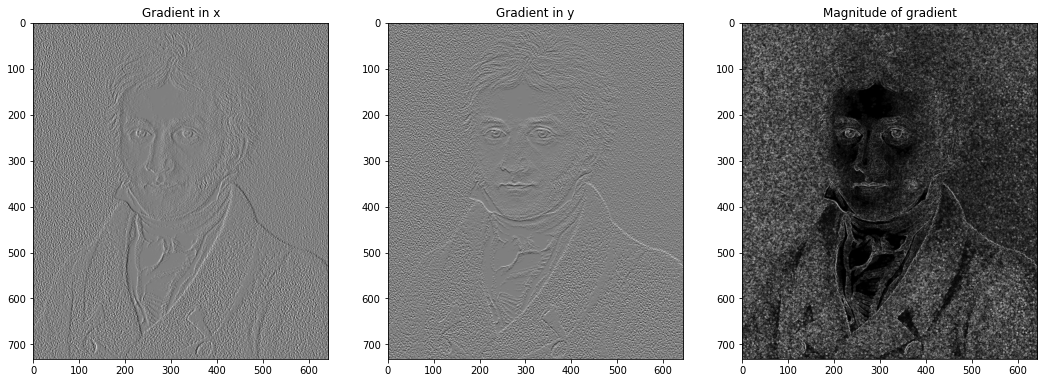

In [8]:
h_x = np.array([(1, 0, -1)])
h_y = h_x.T

i_grad_x_pad_extend = conv2d(image, h_x, padding="extend")

i_grad_y_pad_extend = conv2d(image, h_y, padding="extend")

grad_image_pad_extend = np.sqrt(i_grad_x_pad_extend ** 2 + i_grad_y_pad_extend ** 2)

fig, ax = plt.subplots(1, 3, figsize=(18, 16))
ax[0].set_title("Gradient in x")
ax[0].imshow(i_grad_x_pad_extend / i_grad_x_pad_extend.max(), cmap="gray")
ax[1].set_title("Gradient in y")
ax[1].imshow(i_grad_y_pad_extend / i_grad_y_pad_extend.max(), cmap="gray")
ax[2].set_title("Magnitude of gradient")
ax[2].imshow(grad_image_pad_extend / grad_image_pad_extend.max(), cmap="gray")

## 1 g) Gaussian smoothing

In [9]:
h1 = gauss_filter(3, 0.1)
h2 = gauss_filter(5, 0.1)
h3 = gauss_filter(9, 0.1)
h4 = gauss_filter(3, 1)
h5 = gauss_filter(5, 1)
h6 = gauss_filter(9, 1)
h7 = gauss_filter(3, 10)
h8 = gauss_filter(5, 10)
h9 = gauss_filter(9, 10)

i_conv_h1 = conv2d(image, h1, padding="extend")
i_conv_h2 = conv2d(image, h2, padding="extend")
i_conv_h3 = conv2d(image, h3, padding="extend")
i_conv_h4 = conv2d(image, h4, padding="extend")
i_conv_h5 = conv2d(image, h5, padding="extend")
i_conv_h6 = conv2d(image, h6, padding="extend")
i_conv_h7 = conv2d(image, h7, padding="extend")
i_conv_h8 = conv2d(image, h8, padding="extend")
i_conv_h9 = conv2d(image, h9, padding="extend")

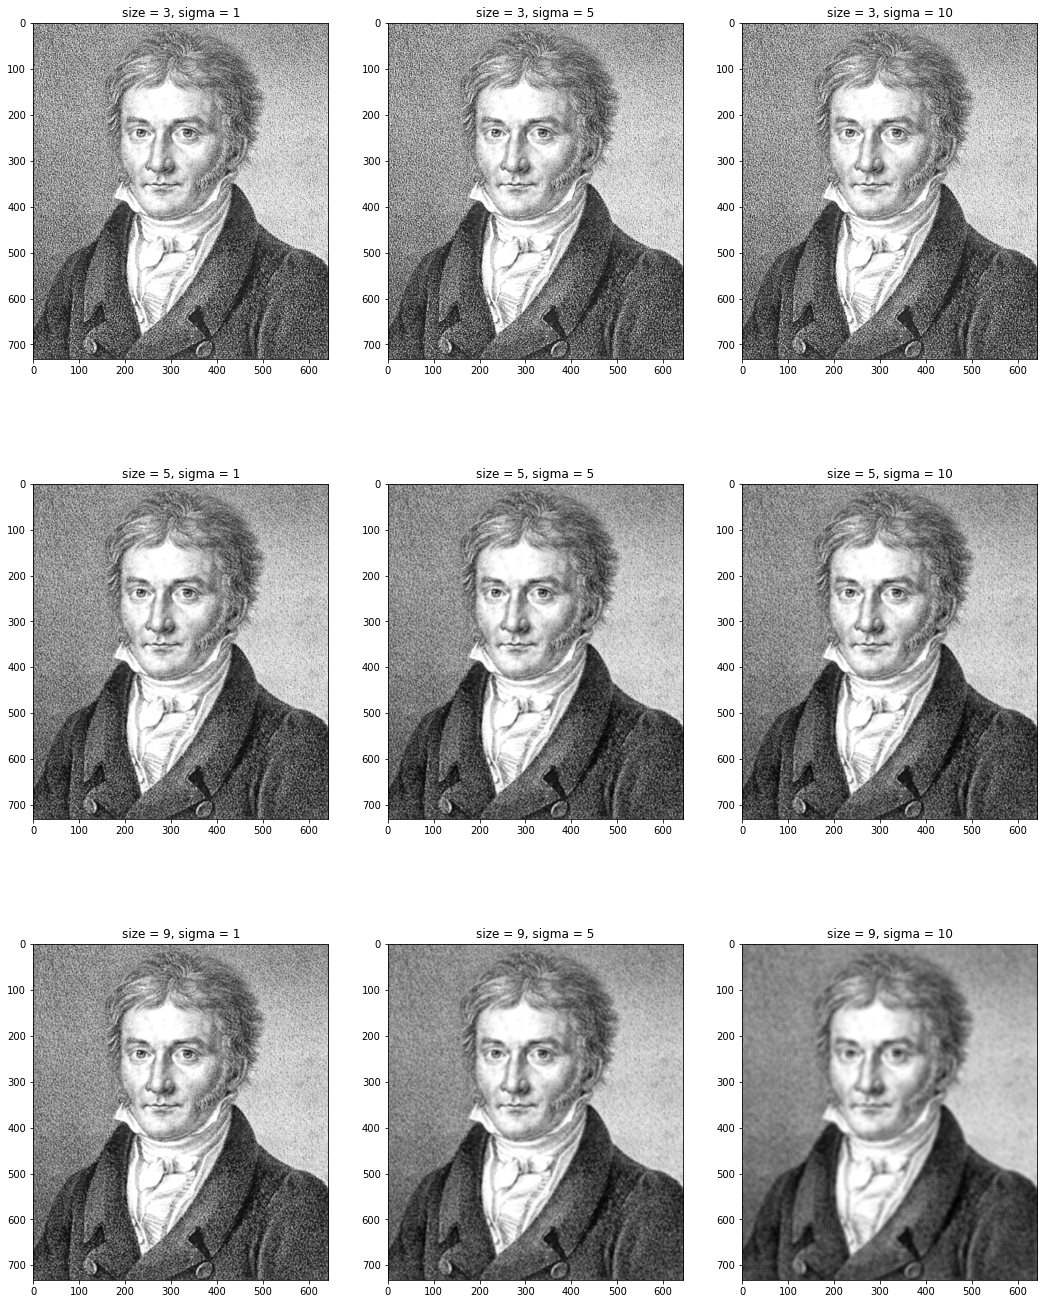

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(18, 24))
ax[0, 0].set_title("size = 3, sigma = 1")
ax[0, 0].imshow(i_conv_h1 / i_conv_h1.max(), cmap="gray")
ax[0, 1].set_title("size = 3, sigma = 5")
ax[0, 1].imshow(i_conv_h2 / i_conv_h2.max(), cmap="gray")
ax[0, 2].set_title("size = 3, sigma = 10")
ax[0, 2].imshow(i_conv_h3 / i_conv_h3.max(), cmap="gray")
ax[1, 0].set_title("size = 5, sigma = 1")
ax[1, 0].imshow(i_conv_h4 / i_conv_h4.max(), cmap="gray")
ax[1, 1].set_title("size = 5, sigma = 5")
ax[1, 1].imshow(i_conv_h5 / i_conv_h5.max(), cmap="gray")
ax[1, 2].set_title("size = 5, sigma = 10")
ax[1, 2].imshow(i_conv_h6 / i_conv_h6.max(), cmap="gray")
ax[2, 0].set_title("size = 9, sigma = 1")
ax[2, 0].imshow(i_conv_h7 / i_conv_h7.max(), cmap="gray")
ax[2, 1].set_title("size = 9, sigma = 5")
ax[2, 1].imshow(i_conv_h8 / i_conv_h8.max(), cmap="gray")
ax[2, 2].set_title("size = 9, sigma = 10")
ax[2, 2].imshow(i_conv_h9 / i_conv_h9.max(), cmap="gray")

## 1 h) Image gradient of smoothed image

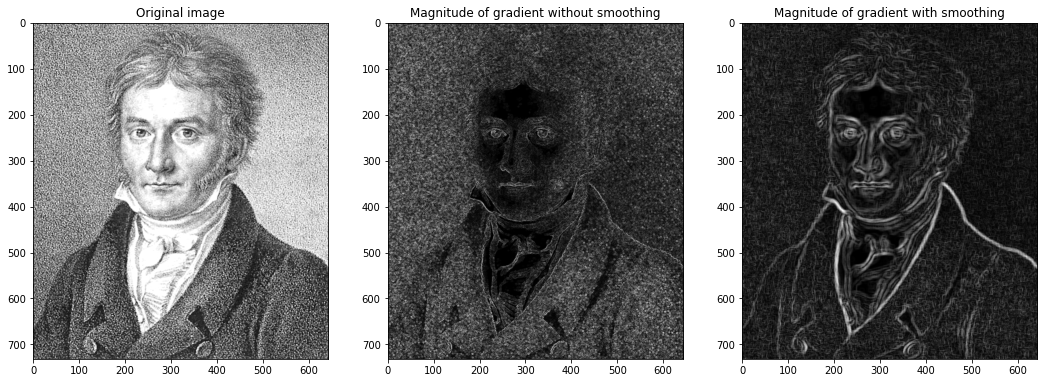

In [11]:
h_x = np.array([(1, 0, -1)])
h_y = h_x.T

i_conv_h_grad_x = conv2d(i_conv_h9, h_x, padding="extend")
i_conv_h_grad_y = conv2d(i_conv_h9, h_y, padding="extend")

grad_image_blur = np.sqrt(i_conv_h_grad_x ** 2 + i_conv_h_grad_y ** 2)

fig, ax = plt.subplots(1, 3, figsize=(18, 16))
ax[0].set_title("Original image")
ax[0].imshow(image, cmap="gray")
ax[1].set_title("Magnitude of gradient without smoothing")
ax[1].imshow(grad_image_pad_extend / grad_image_pad_extend.max(), cmap="gray")
ax[2].set_title("Magnitude of gradient with smoothing")
ax[2].imshow(grad_image_blur / grad_image_blur.max(), cmap="gray")

In [13]:
from solution_checker import check_ex1

check_ex1(conv2d, gauss_filter)
